In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Multivariate Normal Distribution ##

In [2]:
# VIDEO: Multivariate Normal
from IPython.display import YouTubeVideo

YouTubeVideo('lUd7UVydEoI')

Let $\boldsymbol{\Sigma}$ be a positive definite matrix. An $n$-dimensional random vector $\mathbf{X}$ has the *multivariate normal distribution with mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$* if the joint density of the elements of $\mathbf{X}$ is given by

$$
f_\mathbf{X}(\mathbf{x}) ~ = ~ \frac{1}{(\sqrt{2\pi})^n \sqrt{\det(\boldsymbol{\Sigma})} }
\exp\big{(}-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x} - \boldsymbol{\mu})\big{)}
$$

We will say that the elements of $\mathbf{X}$ are *jointly normal* or *jointly Gaussian*.

You should check that the formula is correct when $n = 1$. In this case $\boldsymbol{\Sigma} = [\sigma^2]$ is just a scalar. It is a number, not a larger matrix; its determinant is itself; its inverse is simply $1/\sigma^2$. Also, $\mathbf{x} = x$ and $\boldsymbol{\mu} = \mu$ are just numbers. The formula above reduces to the familiar normal density function with mean $\mu$ and variance $\sigma^2$.

You should also check that the formula is correct in the case when the elements of $\mathbf{X}$ are i.i.d. standard normal. In that case $\mathbf{\mu} = \mathbf{0}$ and $\boldsymbol{\Sigma} = \mathbf{I}_n$, the $n$-dimensional identity matrix.

When $n=2$ the multivariate normal distribution is called *bivariate* normal.

In lab you went through a detailed development of the multivariate normal joint density function, starting with $\mathbf{Z}$ consisting of two i.i.d. standard normal components and then taking linear combinations. It turns out that all multivariate normal random variables can be generated in this way. In fact, there are three useful equivalent definitions of a random vector $\mathbf{X}$ with the multivariate normal distribution.

In [3]:
# VIDEO: Multivariate Normal: Definition

YouTubeVideo('owX4JKA-2F8')

**Definition 1:** $\mathbf{X}$ has the joint density above.

**Definition 2:** $\mathbf{X} = \mathbf{AZ} + \mathbf{b}$ for some i.i.d. standard normal $\mathbf{Z}$, an invertible $\mathbf{A}$, and a column vector $\mathbf{b}$.

**Definition 3:** Every linear combination of elements of $\mathbf{X}$ is normally distributed.

At the end of this section there is a note on establishing the equivalences. Parts of it are hard. Just accept that they are true, and let's examine the properties of the distribution.

**The key to understanding the multivariate normal is Definition 2: every multivariate normal vector is a linear transformation of i.i.d. standard normals.** Let's see what Definition 2 implies for the density.

### Quadratic Form ###
The shape of the density is determined by the *quadratic form* $\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x} - \boldsymbol{\mu})$. The level surfaces are ellipsoids; in two dimensions these are the ellipses you saw in lab. 

Here is the joint density surface of standard normal variables $X_1$ and $X_2$ that are jointly normal with $Cov(X_1, X_2) = 0.8$. The call is `Plot_bivariate_normal(mu, cov)` where the mean vector `mu` is a list and the covariance matrix is a list of lists specifying the rows.

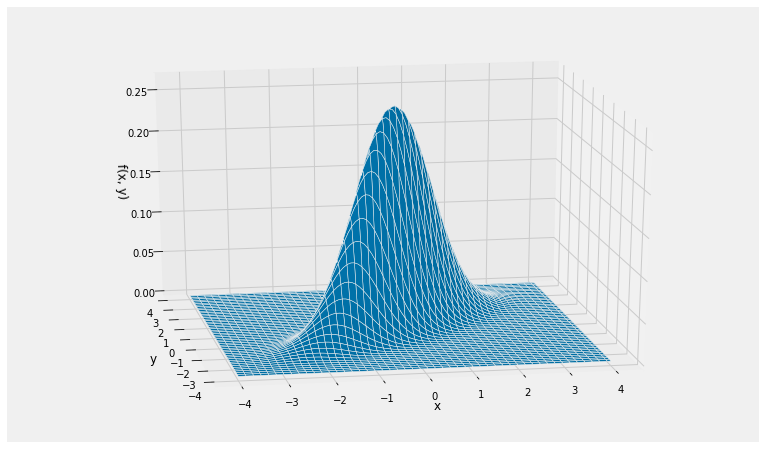

In [4]:
mu = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
Plot_bivariate_normal(mu, cov)

Note the elliptical contours, and that the probability is concentrated around a straight line. 

In more than two dimensions we can no longer draw joint density surfaces. But in three dimensions we can make i.i.d. draws from a multivariate normal joint density and plot the resulting points. Here is an example of the empirical distribution of 1000 observations of standard normal variables $X_1$, $X_2$, and $X_3$ that are jointly normal with $Cov(X_1, X_2) = 0.6$, $Cov(X_1, X_3) = 0.5$, and $Cov(X_2, X_3) = 0.2$. Note the elliptical cloud.

The call is `Scatter_multivariate_normal(mu, cov, n)` where `n` is the number of points to generate. The function checks whether the specified matrix is positive semidefinite.

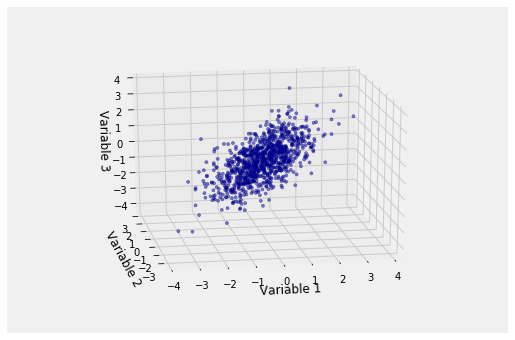

In [5]:
mu2 = [0, 0, 0]
cov2 = [[1, 0.6, 0.5], [0.6, 1, 0.2], [0.5, 0.2, 1]]
Scatter_multivariate_normal(mu2, cov2, 1000)

To see how the quadratic form arises, let $\mathbf{X}$ be multivariate normal. By Definition 2, $\mathbf{X} = \mathbf{AZ} + \mathbf{b}$ for some invertible $\mathbf{A}$ and vector $\mathbf{b}$, and some i.i.d. standard normal $\mathbf{Z}$. 

By multiplication of the marginals, the joint density of $\mathbf{Z}$ is 

$$
f(\mathbf{z}) ~ = ~ \frac{1}{(\sqrt{2\pi})^n} \exp\big{(}-\frac{1}{2}(z_1^2 + z_2^2 + \cdots + z_n^2)\big{)} ~ = ~ \frac{1}{(\sqrt{2\pi})^n }
\exp\big{(}-\frac{1}{2}\mathbf{z}^T\mathbf{z}\big{)}
$$

The preimage of $\mathbf{x}$ under the linear transformation $\mathbf{x} = \mathbf{Az} + \mathbf{b}$ is 

$$
\mathbf{z} ~ = ~ \mathbf{A}^{-1}(\mathbf{x} - \mathbf{b})
$$

and so by change of variable the quadratic form in the density of $\mathbf{X}$ is

$$
\frac{1}{2}\mathbf{z}^T\mathbf{z} ~ = ~ 
\frac{1}{2} (\mathbf{x} - \mathbf{b})^T (\mathbf{A}^{-1})^T \mathbf{A}^{-1}(\mathbf{x} - \mathbf{b}) ~ = ~
\frac{1}{2} (\mathbf{x} - \mathbf{b})^T (\mathbf{AA}^T)^{-1} (\mathbf{x} - \mathbf{b})
$$

Let $\mathbf{\mu_X}$ be the mean vector of $\mathbf{X}$. Because $\mathbf{X} = \mathbf{AZ} + \mathbf{b}$, we have $\mathbf{\mu_X} = \mathbf{b}$. 

The covariance matrix of $\mathbf{Z}$ is $\mathbf{I}_n$. So the covariance matrix of $\mathbf{X}$ is

$$
\boldsymbol{\Sigma}_\mathbf{X} ~ = ~ \mathbf{A} \mathbf{I}_n \mathbf{A}^T ~ = ~ \mathbf{A} \mathbf{A}^T
$$

So the quadratic form in the density of $\mathbf{X}$ becomes $\frac{1}{2} (\mathbf{x} - \mathbf{\mu_X})^T \boldsymbol{\Sigma}_\mathbf{X}^{-1} (\mathbf{x} - \mathbf{\mu_X})$.

### Constant of Integration ###
By linear change of variable, the density of $\mathbf{X}$ is given by
$$
f_\mathbf{X}(\mathbf{x}) ~ = ~ f(\mathbf{z}) \cdot \frac{1}{s}
$$

where $\mathbf{z}$ is the preimage of $\mathbf{x}$ and $s$ is the volume of the parallelopiped formed by the transformed unit vectors. That is, $s = \|\det(\mathbf{A})\|$. Now

$$
\det(\boldsymbol{\Sigma}_\mathbf{X}) ~ = ~ \det(\mathbf{AA}^T) ~ = ~ (\det(\mathbf{A}))^2
$$

Therefore the constant of integration in the density of $\mathbf{X}$ is

$$
\frac{1}{(\sqrt{2\pi})^n \sqrt{\det(\boldsymbol{\Sigma}_\mathbf{X})} }
$$

We have shown how the joint density function arises and what its pieces represent. In the process, we have proved the Definition 2 implies Definition 1. Now let's establish that all three definitions are equivalent.

### The Equivalences ###
Here are some pointers for how to see the equivalences of the three definitions. One of the pieces is not easy to establish.

Definition 2 is at the core of the properties of the multivariate normal. We will try to see why it is equivalent to the other two definitions.

We have seen that Definition 2 implies Definition 1. 

To see that Definition 1 implies Definition 2, it helps to remember that a positive definite matrix $\boldsymbol{\Sigma}$ can be decomposed as $\boldsymbol{\Sigma} = \mathbf{AA}^T$ for some lower triangular $\mathbf{A}$ that has only positive elements on its diagonal and hence is invertible. This is called the *Cholesky decomposition*. Set $\mathbf{Z} = \mathbf{A}^{-1}(\mathbf{X} - \boldsymbol{\mu})$ to see that Definition 1 implies Definition 2. 

So Definitions 1 and 2 are equivalent.

You already know that linear combinations of independent normal variables are normal. If $\mathbf{X}$ is a linear transformation of i.i.d. standard normal variables $\mathbf{Z}$, then any linear combination of elements of $\mathbf{X}$ is also a linear combination of elements of $\mathbf{Z}$ and hence is normal. This means that Definition 2 implies Definition 3.

Showing that Definition 3 implies Definition 2 requires some math. Multivariate moment generating functions are one way to see why the result is true, if we accept that moment genrating functions determine distributions, but we won't go into that here. 